# Анализ влияния уровня образования родителей и прохождения курса подготовки на результаты студентов

**Автор:** svut  
**Дата:** октябрь 2025  
**Источник данных:** [Students Performance in Exams — Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

## Цель исследования
Определить, влияет ли образование родителей и участие в курсе подготовки на результаты студентов.

## Задачи:
1. Провести очистку и предварительный анализ данных.  
2. Исследовать распределения баллов и зависимости между переменными.  
3. Проверить гипотезу: "Прохождение курса подготовки положительно влияет на общий результат экзаменов".  
4. Визуализировать результаты и сформулировать выводы.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

> В датасете 1000 записей. Пропусков нет. Все оценки находятся в диапазоне от 0 до 100.


In [33]:
df['sum score'] = df['math score'] + df['reading score'] + df['writing score']

df['edu group'] = df['parental level of education'].replace({
    "some high school": "low",
    "high school": "low",
    "some college": "medium",
    "associate's degree": "medium",
    "bachelor's degree": "high",
    "master's degree": "high"
})

df['norm score'] = (df['sum score'] + df['sum score'].mean()) / df['sum score'].std()

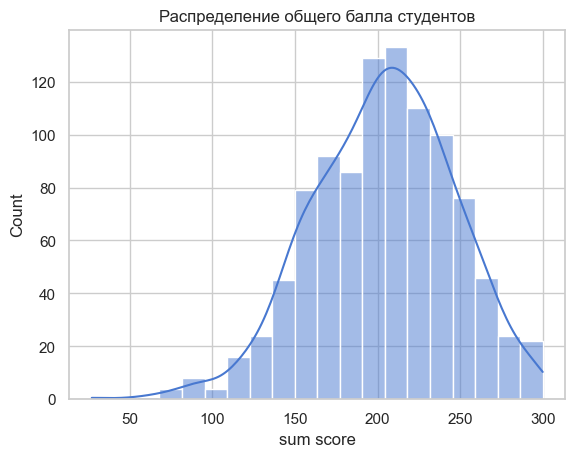

In [34]:
# Распределение баллов
sns.histplot(df['sum score'], bins=20, kde=True)
plt.title('Распределение общего балла студентов')
plt.show()

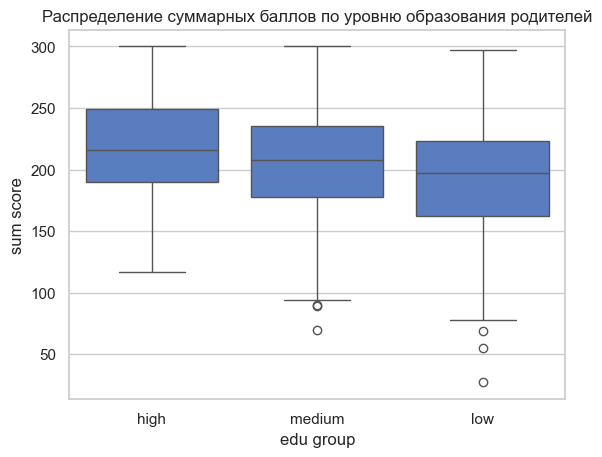

In [35]:
# Зависимость от уровня образования
sns.boxplot(x='edu group', y='sum score', data=df)
plt.title("Распределение суммарных баллов по уровню образования родителей")
plt.show()

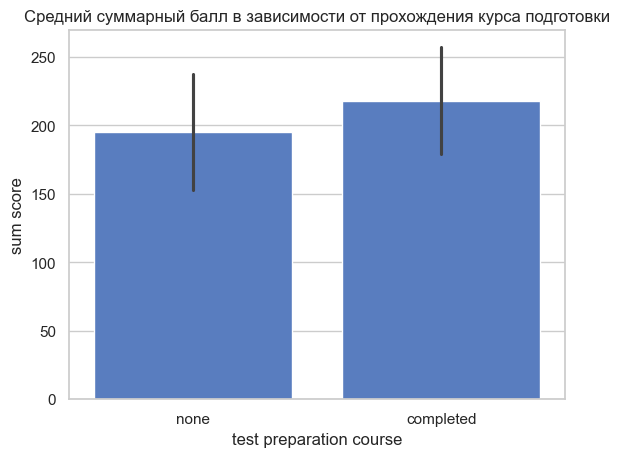

In [38]:
# Влияние курса подготовки

sns.barplot(x='test preparation course', y='sum score', data=df, errorbar='sd')
plt.title('Средний суммарный балл в зависимости от прохождения курса подготовки')
plt.show()

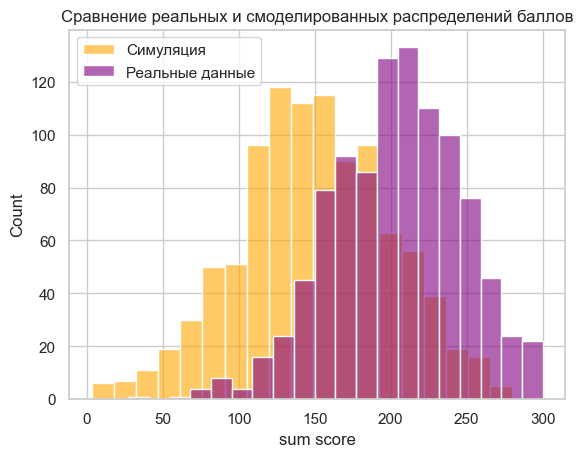

In [50]:
sim_scores = np.random.normal(loc=150, scale=50, size=1000)
sns.histplot(sim_scores, bins=20, color='orange', label='Симуляция', alpha=0.6)
sns.histplot(df["sum score"], bins=20, color='purple', label='Реальные данные', alpha=0.6)
plt.legend()
plt.title("Сравнение реальных и смоделированных распределений баллов")
plt.show()

## Основные наблюдения:
- Студенты, прошедшие курс подготовки, в среднем показывают результат выше.  
- Наблюдается тенденция роста баллов с увеличением уровня образования родителей.  
- Распределение баллов ближе к нормальному, но с небольшим перекосом вправо.

## Итог:
Можно сделать вывод, что как образование родителей, так и подготовка к тесту оказывают заметное влияние на академические результаты.